# SUS data Mato Grosso

## Alta Floresta and Tangará da Serra

This notebook is an exploratory analysis of SUS data in the municipalities of Alta Floresta and Tangará da Serra, in Mato Grosso State, Brazil.

**Reference:**

 - Ignotti, E., Hacon, S. d. S., Junger, W. L., Mourão, D., Longo, K., Freitas, S., Artaxo, P., and Leon, A. C. M. P. d. (2010). Air pollution and hospital admissions for respiratory diseases in the subequatorial amazon: a time series approach. Cadernos de saude publica, 26:747–761. 

**================================================================================================**

## 1. Initial setup

In [1]:
# Load packages.
import sys
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
# My repository.
repository = "/home/alex/Dropbox/repositories/doctoral_thesis/libraries/"

In [3]:
# Include once my repository in the path for searching libraries.
if repository not in sys.path:
    sys.path.append(repository)
    
# Import my libraries.
import datasus.tools as sus

In [4]:
# Incorpore the onging changes.
importlib.reload(sus);

## 2. Read data from SUS

In [5]:
# Read all data for all locations in Mato Grosso. 
# We have to put municipalities as strings because of reading from csv.
SUS = pd.read_csv("/media/alex/ALEXDATA/data_sets/HEALTH/HOSPITALIZATION/MT/DATASUS_MT.csv", 
                   index_col=0, dtype={"MUNIC_MOV": str, "MUNIC_RES": str})

# Because we are importing from a csv.
SUS.index = pd.to_datetime(SUS.index)

# Some blank values come as nans. Lets put them as strings.
SUS.fillna("", inplace=True)

/home/alex/anaconda3/envs/climate36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
SUS.shape

(3250292, 12)

## 3. Alta Floresta region

In [7]:
# Codes for municipalities close to Alta Floresta:
# Alta Foresta, Apiacás, Nova Bandeirantes, Nova Monte Verde, Paranaíta, Carlinda and 
# Nova Canaã do Norte
codes = ["510025", "510080", "510615", "510895", "510629", 
         "510279", "510621"]

In [8]:
# Only respiratory diseases divided into age ranges.
SUS_children = sus.data_frame_selection(SUS, disease_codes=["J"], age_ranges=[[0, 5]],
                                        time_ranges=[["2005-01", "2005-12"]],
                                        hospital_loc_codes=codes)

SUS_adults = sus.data_frame_selection(SUS, disease_codes=["J"], age_ranges=[[6, 65]],
                                      time_ranges=[["2005-01", "2005-12"]],
                                      hospital_loc_codes=codes)

SUS_elderly = sus.data_frame_selection(SUS, disease_codes=["J"], age_ranges=[[65, 200]],
                                       time_ranges=[["2005-01", "2005-12"]],
                                       hospital_loc_codes=codes)

SUS_all = sus.data_frame_selection(SUS, disease_codes=["J"], 
                                   time_ranges=[["2005-01", "2005-12"]],
                                   hospital_loc_codes=codes)

# Make the daily counts.
COUNTS_children = sus.make_counts(SUS_children)
COUNTS_adults = sus.make_counts(SUS_adults)
COUNTS_elderly = sus.make_counts(SUS_elderly)
COUNTS_all = sus.make_counts(SUS_all)

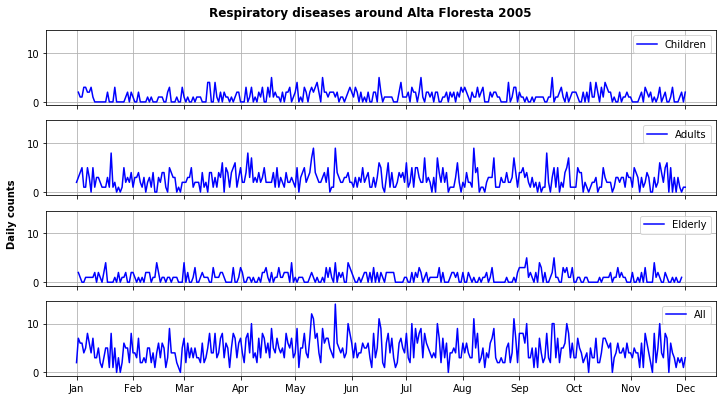

In [9]:
# Plot time series.
fig, axes = plt.subplots(4, 1, figsize=(12, 6), sharex=True, sharey=True)
plt.subplots_adjust(top=0.925, wspace=0.1)

for DATA, axis, label in zip(
    [COUNTS_children, COUNTS_adults, COUNTS_elderly, COUNTS_all], 
    axes.ravel(),
    ["Children", "Adults", "Elderly", "All"]):
    
    axis.plot(DATA.index, DATA.COUNT, color="blue", label=label)
    axis.legend()
    axis.grid()
        
axis.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axis.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
fig.text(0.08, 0.5, "Daily counts", weight="bold", va='center', ha="left", rotation="vertical")
plt.suptitle("Respiratory diseases around Alta Floresta 2005", weight="bold");

In [10]:
# Descriptive analysis for whole 2005 period.
data = np.c_[COUNTS_children.COUNT.describe().values,
             COUNTS_adults.COUNT.describe().values,
             COUNTS_elderly.COUNT.describe().values,
             COUNTS_all.COUNT.describe().values].T

data[:, 0] = (COUNTS_children.COUNT.sum(),
              COUNTS_adults.COUNT.sum(),
              COUNTS_elderly.COUNT.sum(),
              COUNTS_all.COUNT.sum())

print("Descriptive analysis for whole 2005 period:\n")
pd.DataFrame(data, 
             columns=["Total", "Average", "Std", "Min", "P25", "P50", "P75", "Max"],
             index=["Children", "Adults", "Elderly", "All"])

Descriptive analysis for whole 2005 period:



,Total,Average,Std,Min,P25,P50,P75,Max
Children,395.0,1.182635,1.192896,0.0,0.0,1.0,2.0,5.0
Adults,872.0,2.602985,1.860556,0.0,1.0,2.0,4.0,9.0
Elderly,334.0,1.006024,1.088234,0.0,0.0,1.0,2.0,5.0
All,1580.0,4.716418,2.515854,0.0,3.0,4.0,6.0,14.0


In [11]:
# Descriptive analysis of 2005 dry season.
dry_season_months = ["July", "August", "September", "October", "November"]

# Dry season cuts.
COUNTS_children_dry = COUNTS_children[
    sus.counts_season_mask(COUNTS_children, dry_season_months)]

COUNTS_adults_dry = COUNTS_adults[
    sus.counts_season_mask(COUNTS_adults, dry_season_months)]

COUNTS_elderly_dry = COUNTS_elderly[
    sus.counts_season_mask(COUNTS_elderly, dry_season_months)]

COUNTS_all_dry = COUNTS_all[
    sus.counts_season_mask(COUNTS_all, dry_season_months)]

data = np.c_[COUNTS_children_dry.COUNT.describe().values,
             COUNTS_adults_dry.COUNT.describe().values,
             COUNTS_elderly_dry.COUNT.describe().values,
             COUNTS_all_dry.COUNT.describe().values].T

data[:, 0] = (COUNTS_children_dry.COUNT.sum(),
              COUNTS_adults_dry.COUNT.sum(),
              COUNTS_elderly_dry.COUNT.sum(),
              COUNTS_all_dry.COUNT.sum())

print("Descriptive analysis of 2005 dry season:\n")
pd.DataFrame(data, 
             columns=["Total", "Average", "Std", "Min", "P25", "P50", "P75", "Max"],
             index=["Children", "Adults", "Elderly", "All"])

Descriptive analysis of 2005 dry season:



,Total,Average,Std,Min,P25,P50,P75,Max
Children,187.0,1.222222,1.148352,0.0,0.0,1.0,2.0,5.0
Adults,384.0,2.509804,1.933492,0.0,1.0,2.0,4.0,9.0
Elderly,149.0,0.980263,1.124504,0.0,0.0,1.0,2.0,5.0
All,709.0,4.633987,2.577105,0.0,3.0,4.0,6.0,11.0


## 4. Tangará da Serra region

In [12]:
# Codes for municipalities close to Tangará da Serra:
# Brasnorte, Sapezal, Campo Novo do Pareceris, Tangará da Serra, Nova Marilândia, Santo 
# Afonso, Barra do Bugres, Arenápolis, Denise, Nova Olímpia e Porto Estrela.
codes = ["510190", "510787", "510263", "510795", "510885", 
         "510726", "510170", "510130", "510345", "510623", 
         "510685"]

In [13]:
# Only respiratory diseases divided into age ranges.
SUS_children = sus.data_frame_selection(SUS, disease_codes=["J"], age_ranges=[[0, 5]],
                                        time_ranges=[["2005-01", "2005-12"]],
                                        hospital_loc_codes=codes)

SUS_adults = sus.data_frame_selection(SUS, disease_codes=["J"], age_ranges=[[6, 65]],
                                      time_ranges=[["2005-01", "2005-12"]],
                                      hospital_loc_codes=codes)

SUS_elderly = sus.data_frame_selection(SUS, disease_codes=["J"], age_ranges=[[65, 200]],
                                       time_ranges=[["2005-01", "2005-12"]],
                                       hospital_loc_codes=codes)

SUS_all = sus.data_frame_selection(SUS, disease_codes=["J"], 
                                   time_ranges=[["2005-01", "2005-12"]],
                                   hospital_loc_codes=codes)

# Make the daily counts.
COUNTS_children = sus.make_counts(SUS_children)
COUNTS_adults = sus.make_counts(SUS_adults)
COUNTS_elderly = sus.make_counts(SUS_elderly)
COUNTS_all = sus.make_counts(SUS_all)

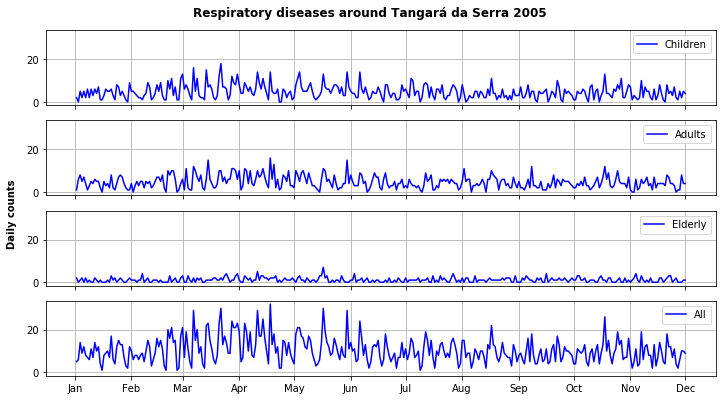

In [14]:
# Plot time series.
fig, axes = plt.subplots(4, 1, figsize=(12, 6), sharex=True, sharey=True)
plt.subplots_adjust(top=0.925, wspace=0.1)

for DATA, axis, label in zip(
    [COUNTS_children, COUNTS_adults, COUNTS_elderly, COUNTS_all], 
    axes.ravel(),
    ["Children", "Adults", "Elderly", "All"]):
    
    axis.plot(DATA.index, DATA.COUNT, color="blue", label=label)
    axis.legend()
    axis.grid()
        
axis.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axis.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
fig.text(0.08, 0.5, "Daily counts", weight="bold", va='center', ha="left", rotation="vertical")
plt.suptitle("Respiratory diseases around Tangará da Serra 2005", weight="bold");

In [15]:
# Descriptive analysis for whole 2005 period.
data = np.c_[COUNTS_children.COUNT.describe().values,
             COUNTS_adults.COUNT.describe().values,
             COUNTS_elderly.COUNT.describe().values,
             COUNTS_all.COUNT.describe().values].T

data[:, 0] = (COUNTS_children.COUNT.sum(),
              COUNTS_adults.COUNT.sum(),
              COUNTS_elderly.COUNT.sum(),
              COUNTS_all.COUNT.sum())

print("Descriptive analysis for whole 2005 period:\n")
pd.DataFrame(data, 
             columns=["Total", "Average", "Std", "Min", "P25", "P50", "P75", "Max"],
             index=["Children", "Adults", "Elderly", "All"])

Descriptive analysis for whole 2005 period:



,Total,Average,Std,Min,P25,P50,P75,Max
Children,1578.0,4.724551,3.255238,0.0,2.0,4.0,6.0,18.0
Adults,1564.0,4.682635,2.998678,0.0,2.0,4.0,6.0,16.0
Elderly,371.0,1.110778,1.088986,0.0,0.0,1.0,2.0,7.0
All,3487.0,10.440120,5.832060,1.0,6.0,9.5,14.0,32.0


In [16]:
# Descriptive analysis of 2005 dry season.
dry_season_months = ["July", "August", "September", "October", "November"]

# Dry season cuts.
COUNTS_children_dry = COUNTS_children[
    sus.counts_season_mask(COUNTS_children, dry_season_months)]

COUNTS_adults_dry = COUNTS_adults[
    sus.counts_season_mask(COUNTS_adults, dry_season_months)]

COUNTS_elderly_dry = COUNTS_elderly[
    sus.counts_season_mask(COUNTS_elderly, dry_season_months)]

COUNTS_all_dry = COUNTS_all[
    sus.counts_season_mask(COUNTS_all, dry_season_months)]

data = np.c_[COUNTS_children_dry.COUNT.describe().values,
             COUNTS_adults_dry.COUNT.describe().values,
             COUNTS_elderly_dry.COUNT.describe().values,
             COUNTS_all_dry.COUNT.describe().values].T

data[:, 0] = (COUNTS_children_dry.COUNT.sum(),
              COUNTS_adults_dry.COUNT.sum(),
              COUNTS_elderly_dry.COUNT.sum(),
              COUNTS_all_dry.COUNT.sum())

print("Descriptive analysis of 2005 dry season:\n")
pd.DataFrame(data, 
             columns=["Total", "Average", "Std", "Min", "P25", "P50", "P75", "Max"],
             index=["Children", "Adults", "Elderly", "All"])

Descriptive analysis of 2005 dry season:



,Total,Average,Std,Min,P25,P50,P75,Max
Children,625.0,4.084967,2.702211,0.0,2.0,4.0,6.0,13.0
Adults,625.0,4.084967,2.438582,0.0,2.0,4.0,6.0,12.0
Elderly,167.0,1.091503,1.008904,0.0,0.0,1.0,2.0,4.0
All,1403.0,9.169935,4.479178,1.0,6.0,9.0,12.0,26.0
